In [124]:
import pandas as pd
import json
import matplotlib as mpl
from matplotlib import pyplot as plt, patches, ticker
from manim import *

config.media_embed = True

In [125]:
with open('results.json') as results_file:
    results_json = json.load(results_file)
results = pd.json_normalize(results_json, "benchmarks")
results

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit
0,BM_MultiKeyMatrix_Init/2,0,0,BM_MultiKeyMatrix_Init/2,iteration,1,0,1,3005410,231.897352,231.619384,ns
1,BM_MultiKeyMatrix_Init/4,0,1,BM_MultiKeyMatrix_Init/4,iteration,1,0,1,3047564,228.262591,228.032292,ns
2,BM_MultiKeyMatrix_Init/8,0,2,BM_MultiKeyMatrix_Init/8,iteration,1,0,1,3050206,222.803920,222.695500,ns
3,BM_MultiKeyMatrix_Init/16,0,3,BM_MultiKeyMatrix_Init/16,iteration,1,0,1,3060184,226.814136,226.696622,ns
4,BM_MultiKeyMatrix_Init/32,0,4,BM_MultiKeyMatrix_Init/32,iteration,1,0,1,3078028,225.463149,225.336190,ns
5,BM_MultiKeyMatrix_Init/64,0,5,BM_MultiKeyMatrix_Init/64,iteration,1,0,1,3023209,230.042014,229.905578,ns
6,BM_MultiKeyMatrix_Init/128,0,6,BM_MultiKeyMatrix_Init/128,iteration,1,0,1,2649657,262.849659,262.693180,ns
7,BM_MultiKeyMatrix_Init/256,0,7,BM_MultiKeyMatrix_Init/256,iteration,1,0,1,2528463,281.192733,280.991276,ns
8,BM_MultiKeyMatrix_Init/512,0,8,BM_MultiKeyMatrix_Init/512,iteration,1,0,1,1871346,327.228049,327.006628,ns
9,BM_MultiKeyMatrix_Init/1024,0,9,BM_MultiKeyMatrix_Init/1024,iteration,1,0,1,1881901,371.950142,371.784014,ns


In [126]:
results["operation"] = results["name"].str.extract(r'_([A-Za-z0-9]+)/')
results["operation"] = results["operation"].str.lower()
results["size"] = results["name"].str.extract(r'/(\d+)').astype(int)
results

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,operation,size
0,BM_MultiKeyMatrix_Init/2,0,0,BM_MultiKeyMatrix_Init/2,iteration,1,0,1,3005410,231.897352,231.619384,ns,init,2
1,BM_MultiKeyMatrix_Init/4,0,1,BM_MultiKeyMatrix_Init/4,iteration,1,0,1,3047564,228.262591,228.032292,ns,init,4
2,BM_MultiKeyMatrix_Init/8,0,2,BM_MultiKeyMatrix_Init/8,iteration,1,0,1,3050206,222.803920,222.695500,ns,init,8
3,BM_MultiKeyMatrix_Init/16,0,3,BM_MultiKeyMatrix_Init/16,iteration,1,0,1,3060184,226.814136,226.696622,ns,init,16
4,BM_MultiKeyMatrix_Init/32,0,4,BM_MultiKeyMatrix_Init/32,iteration,1,0,1,3078028,225.463149,225.336190,ns,init,32
5,BM_MultiKeyMatrix_Init/64,0,5,BM_MultiKeyMatrix_Init/64,iteration,1,0,1,3023209,230.042014,229.905578,ns,init,64
6,BM_MultiKeyMatrix_Init/128,0,6,BM_MultiKeyMatrix_Init/128,iteration,1,0,1,2649657,262.849659,262.693180,ns,init,128
7,BM_MultiKeyMatrix_Init/256,0,7,BM_MultiKeyMatrix_Init/256,iteration,1,0,1,2528463,281.192733,280.991276,ns,init,256
8,BM_MultiKeyMatrix_Init/512,0,8,BM_MultiKeyMatrix_Init/512,iteration,1,0,1,1871346,327.228049,327.006628,ns,init,512
9,BM_MultiKeyMatrix_Init/1024,0,9,BM_MultiKeyMatrix_Init/1024,iteration,1,0,1,1881901,371.950142,371.784014,ns,init,1024


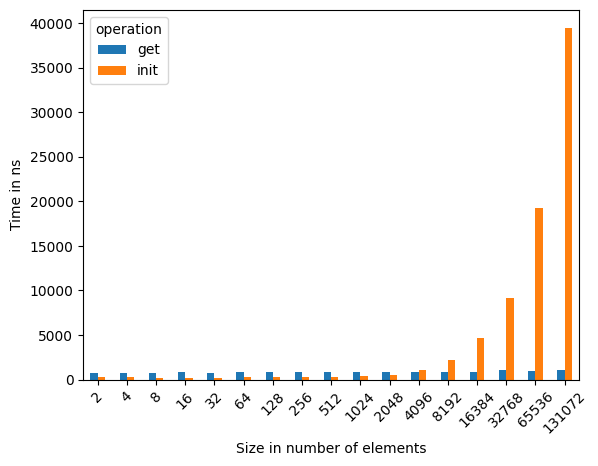

In [127]:
times = results[["operation", "real_time", "size"]].pivot(index="size", columns="operation", values="real_time")
times.plot.bar()
plt.xticks(rotation = 45)
plt.xlabel("Size in number of elements")
plt.ylabel("Time in ns")
plt.show()

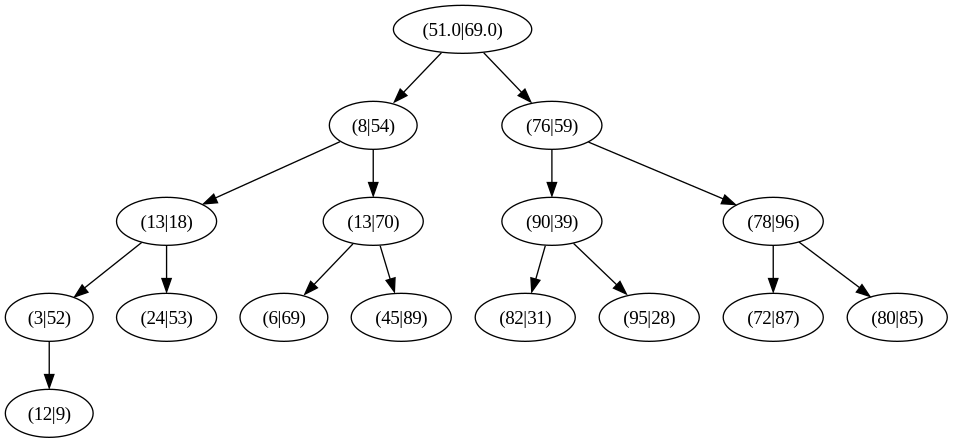

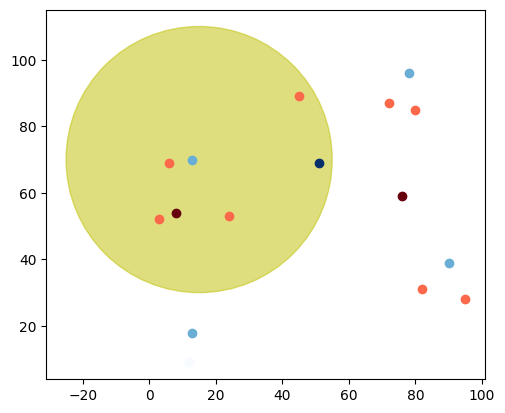

In [128]:
from anytree import Node, RenderTree, LevelOrderGroupIter
from anytree.exporter import DotExporter
from IPython.display import Image, display


def generate_label(x, y):
    return "({}|{})".format(x, y)


range_query = pd.read_csv("builddir/rangeSearchTest2.csv")

root = (
    range_query[["x", "y"]]
    .merge(
        range_query[["parent_x", "parent_y"]],
        how="right",
        left_on=["x", "y"],
        right_on=["parent_x", "parent_y"],
    )
    .drop_duplicates()
)
root = root[root["x"].isna()]
root = (root.iloc[0]["parent_x"], root.iloc[0]["parent_y"])
root = Node(generate_label(root[0], root[1]), x=root[0], y=root[1])

nodes = [root]

def get_node(x: float, y: float) -> Node | None:
    for node in nodes:
        if node.x == x and node.y == y:
            return node
    return None

def add_node(x: float, y: float) -> Node:
    existing_node = get_node(x, y)
    if existing_node is not None:
        return existing_node

    if x == root.x and y == root.y:
        newNode = Node(generate_label(x, y), parent=root, x=x, y=y)
        nodes.append(newNode)
        return newNode

    n = range_query[(range_query["x"] == x) & (range_query["y"] == y)].iloc[0]

    for possible_node in nodes:
        if possible_node.x == n["x"] and possible_node.y == n["x"]:
            return possible_node

    parent = add_node(n["parent_x"], n["parent_y"])

    newNode = Node(generate_label(x, y), parent=parent, x=x, y=y)
    nodes.append(newNode)
    return newNode


for _, row in range_query.iterrows():
    add_node(row["x"], row["y"])

DotExporter(root).to_picture("asd.png")
display(Image(filename="asd.png"))

fig, ax = plt.subplots()
ax.set_aspect("equal")

currentlyX = True
x_level = 0
y_level = 0
max_level = root.height / 2

range_circle = plt.Circle((15, 70), 40, color="y", alpha=0.5)
ax.add_patch(range_circle)

for node_group in LevelOrderGroupIter(root):
    if currentlyX:
        current_color=mpl.colormaps["Blues"](1 - x_level / max_level)
        for node in node_group:
            ax.plot(node.x, node.y, "o", color=current_color)
        x_level = x_level + 1
    else:
        current_color=mpl.colormaps["Reds"](1 - y_level / max_level)
        for node in node_group:
            ax.plot(node.x, node.y, "o", color=current_color)
        y_level = y_level + 1

    currentlyX = not currentlyX


(0.0, 5000.0)

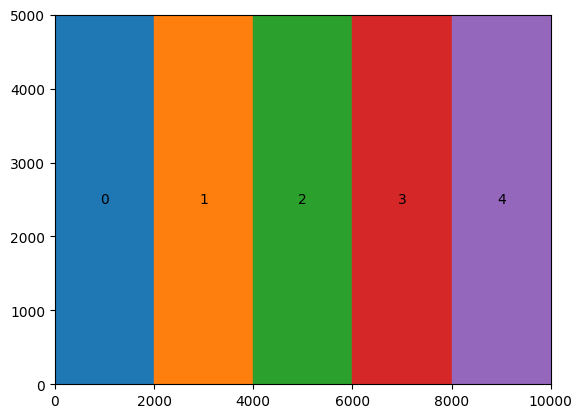

In [129]:
df_chunks = pd.read_csv("builddir/chunks.csv", index_col="id")
df_chunks

fig, ax = plt.subplots()

for i, r in df_chunks.iterrows():
    width = r["xmax"] - r["xmin"]
    height = r["ymax"] - r["ymin"]
    rectangle = patches.Rectangle((r["xmin"], r["ymin"]), width, height, color="C{}".format(i))
    rx, ry = rectangle.get_xy()
    cx = rx + rectangle.get_width() / 2.0
    cy = ry + rectangle.get_height() / 2.0
    ax.add_patch(rectangle)
    ax.annotate(i, (cx, cy), ha="center", va="center")

plt.xlim(0, 10000)
plt.ylim(0, 5000)

## Simulation Visualization

[07/10/23 12:19:37] INFO                                                                   ]8;id=128059;file:///home/henne/Dev/GAUG/Environments/visualization/lib/python3.11/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=630888;file:///home/henne/Dev/GAUG/Environments/visualization/lib/python3.11/site-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/home/henne/Dev/GAUG/PCHPC/hpc-2023-bee-simulation/media/ima                         
                             ges/hpc-2023-bee-simulation/MyExample_ManimCE_v0.17.3.png'                            
                                                                                                                   

                    INFO     Rendered MyExample                                                        ]8;id=832963;file:///home/henne/Dev/GAUG/Environments/visualization/lib/python3.11/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=202823;file:///home/henne/Dev/GAUG/Environments/visualization/lib/python3.11/site-packages/manim/scene/scene.py#241\241]8;;\
                             Played 0 animations                                                                   

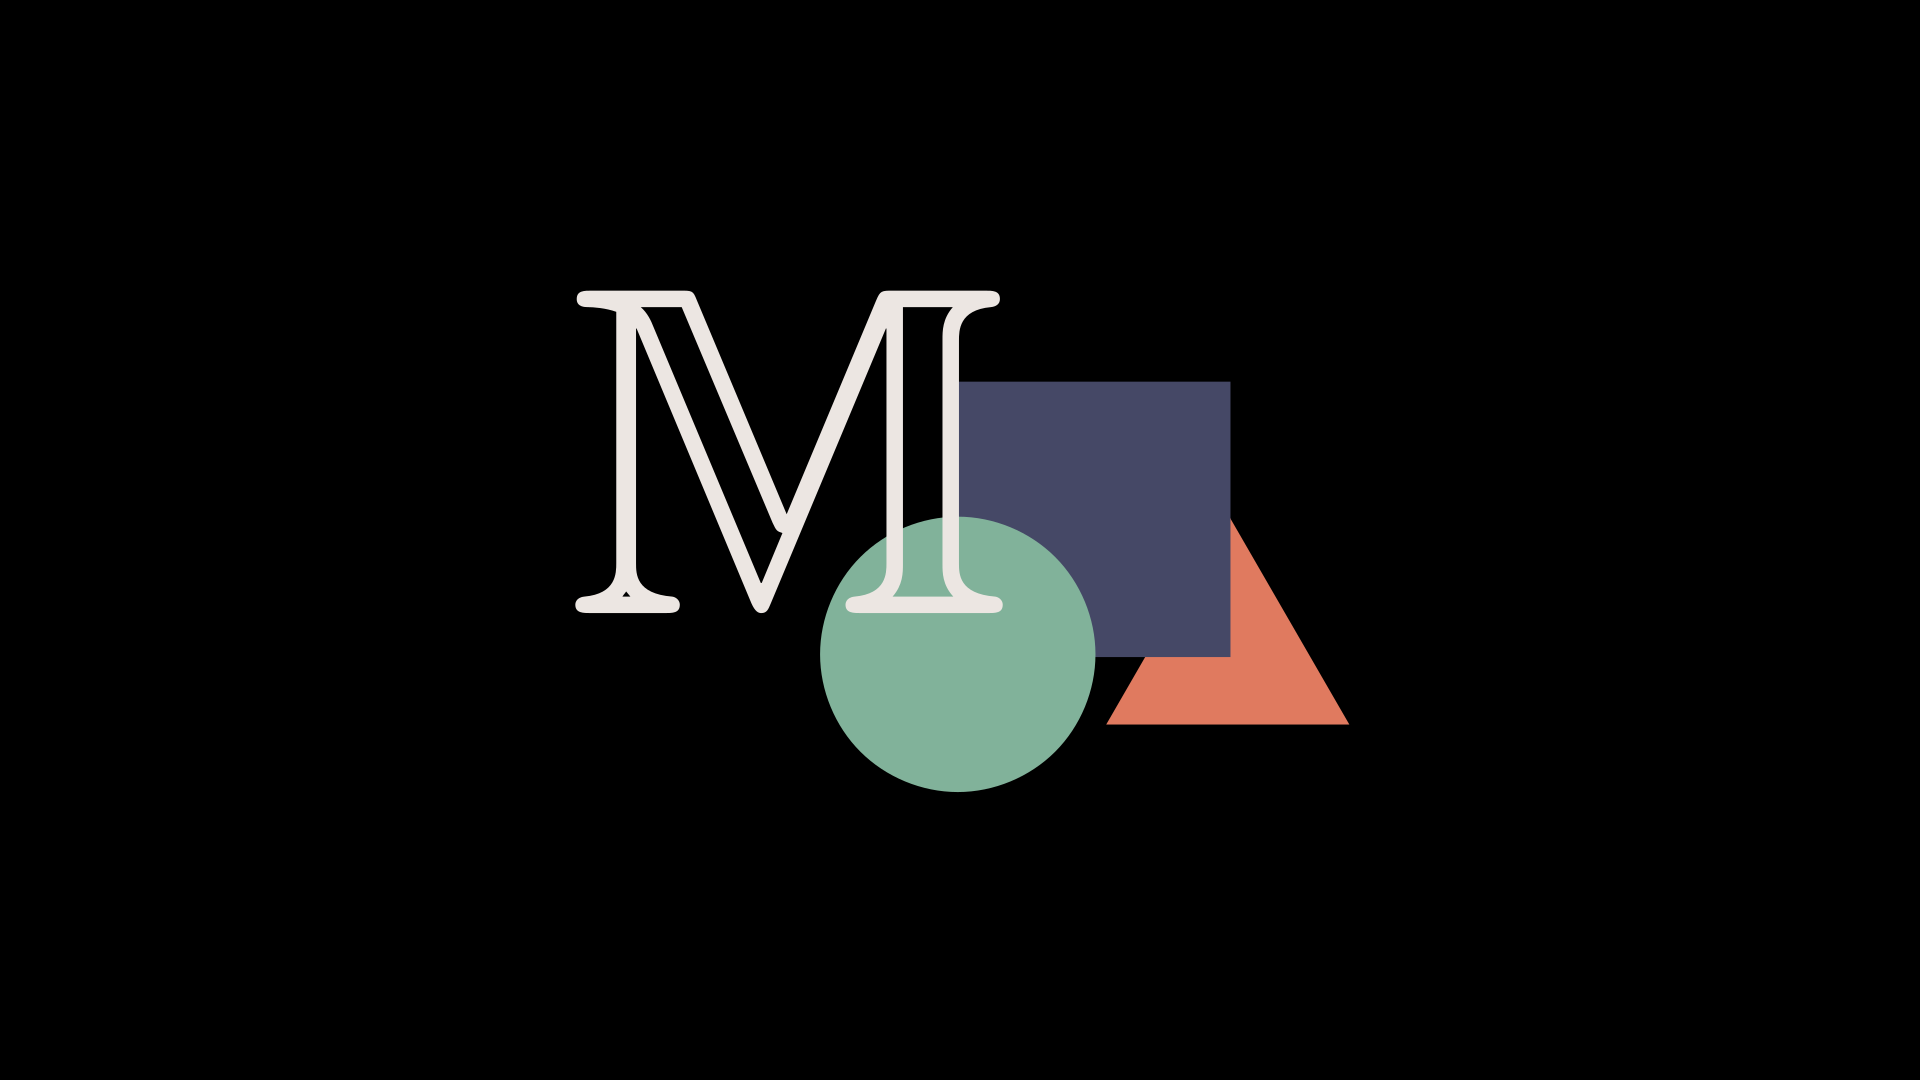

In [130]:
%%manim MyExample
class MyExample(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)


In [131]:
import subprocess
from io import StringIO
import re

results = []

for i in range(1, 7):
    p = subprocess.Popen(
        [
            "mpirun",
            "-n",
            str(i),
            "builddir/bee_simulation",
            "--hives=1",
            "--ticks=500",
            "--json",
        ],
        stdout=subprocess.PIPE,
    )
    o = StringIO(p.communicate()[0].decode("utf-8"))
    bm_df = pd.read_json(o, lines=True)
    bm_df = bm_df[bm_df["message"].str.contains("tick: ")]

    p = re.compile("\d+\.\d+")
    last_time = p.search(bm_df.iloc[-1]["message"]).group()
    results.append([i, last_time])

Text(0.5, 1.0, 'Time for a simulation run to complete 500 ticks')

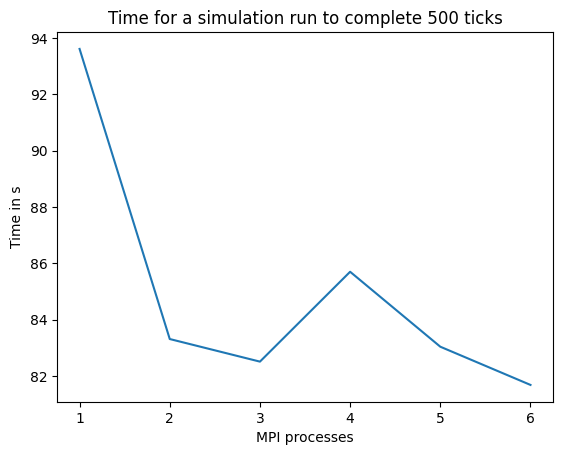

In [132]:
df_results = pd.DataFrame(results, columns=["mpi_processes", "time"])
df_results["time"] = df_results["time"].astype(float)
df_results.set_index("mpi_processes", inplace=True)

fig, ax = plt.subplots()
ax.plot(df_results)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel("MPI processes")
ax.set_ylabel("Time in s")
ax.set_title("Time for a simulation run to complete 500 ticks")

,time,speedup
mpi_processes,,
1,93.609838,1.000000
2,83.308587,1.123652
3,82.506187,1.134580
4,85.697003,1.092335
5,83.035809,1.127343
6,81.679001,1.146070


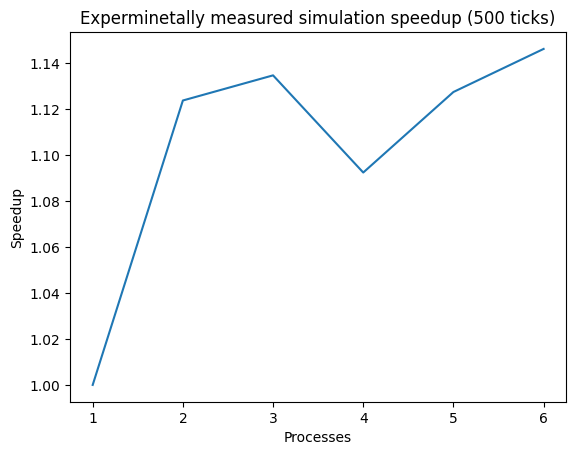

In [133]:
df_speedup = df_results
t1 = df_speedup.loc[1]["time"]
df_speedup["speedup"] = t1 / df_speedup["time"]

fig, ax = plt.subplots()
ax.plot(df_results.index, df_results["speedup"])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel("Processes")
ax.set_ylabel("Speedup")
ax.set_title("Experminetally measured simulation speedup (500 ticks)")

df_speedup